In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

# GLM

## Linear model

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_HARTMANN",
        "210520_LINEAR_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_IMAGE_1_HARTMANN: loaded 6 runs with 3-fold cross validation


subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']


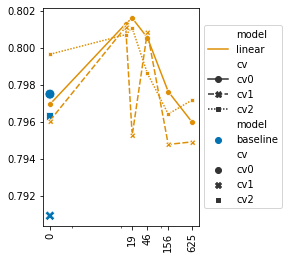

In [3]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_BASELINE_MAX_NODES_IMAGE_1": "baseline",
            "LINEAR_MAX_NODES_IMAGE_1": "linear",
        })
    ],
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 19, 46, 156, 625],
    plot_mode = 'lineplot',
)

## Interaction model

In [4]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']


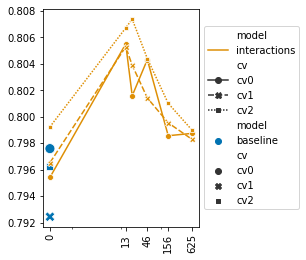

In [5]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 13, 46, 156, 625],
    plot_mode = 'lineplot',
)

In [6]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=7.293874940893317, pvalue=0.01828287301718189)


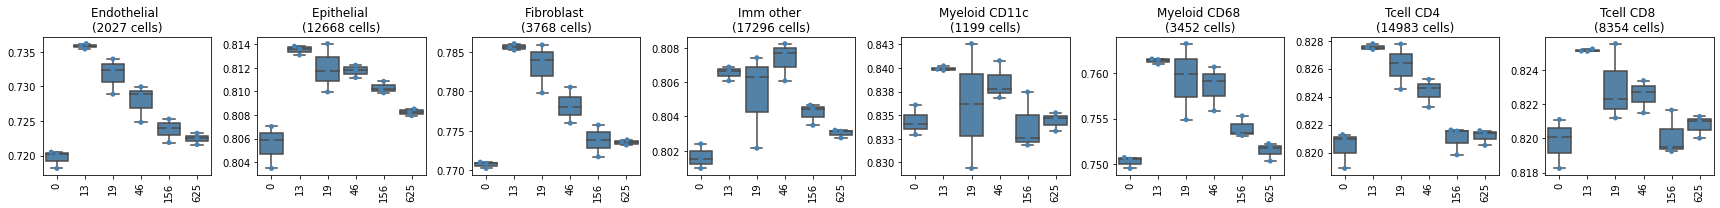

In [7]:
gs_linear.load_target_cell_evaluation()

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [8]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype i

adding graph-level covariates


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1469: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  tissue_meta_data = read_excel(self.data_path + "scMEP_sample_description.xlsx", usecols=usecols)
100%|██████████| 58/58 [00:01<00:00, 29.42it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416425
cross-validation selected: cv0


In [9]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    #model_id=test_id_interaction,
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 37.02it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 0.000000
cross-validation selected: cv0


In [10]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})

setting reinitialized layer weights to layer weights from model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


# Encoder-decoder NCEM models

In [11]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_linear.load_gs()

test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


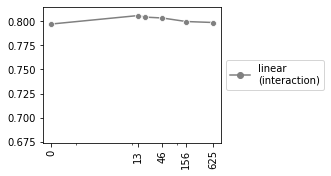

In [12]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_IMAGE_1": "linear \n(interaction)",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'mean_lineplot',
    xticks=[  0,  13,  46, 156, 625],
)

In [13]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

test_id_ed = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)
test_id_ed_ncem_max = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_max_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


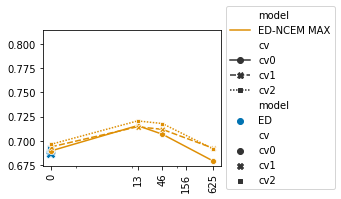

In [14]:
gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_MAX_NODES_IMAGE_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)

In [15]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

test_id_ed_ncem_gcn = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_gcn_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN: loaded 32 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


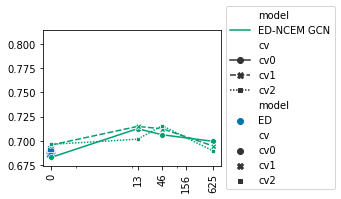

In [16]:
gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_GCN_NODES_IMAGE_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)

In [17]:
print(ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print(ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2))
print(ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print(ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

Ttest_relResult(statistic=13.99895403364687, pvalue=0.005064074601484572)
Ttest_relResult(statistic=5.127340627548463, pvalue=0.03599652697206592)
Ttest_indResult(statistic=-46.69687659557861, pvalue=1.2579788249180536e-06)
Ttest_indResult(statistic=-33.9112751091817, pvalue=4.510879768982605e-06)


In [18]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=dir_gs,
    gs_id="210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=1,
    #model_id='210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22',
    lateral_resolution=1
)
ed_ncem_max._fn_model_weights
ed_ncem_max.get_data_again(
    data_path=dir_data + 'hartmann/',
    data_origin="hartmann"
)
ed_ncem_max.split_data_byidx_again(cv_idx=1)

ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max._model_kwargs['input_shapes']

210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210119_clvmnp_max_nodes_image_1_hartmann_adam_lr1_agrFalse_ei2_di1_ldi1_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_bsS_nf1_md1_rs1_tk4_ne3_fsstandard
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a futu

100%|██████████| 58/58 [00:00<00:00, 137.61it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 4.416425
cross-validation selected: cv1


(8, 36, 2268, 10, 8, 58)

In [19]:
ed_ncem_max.reinitialize_model(
    changed_model_kwargs={'input_shapes': (8, 36, 2268, 1, 8, 58)},
)

setting reinitialized layer weights to layer weights from model 210119_clvmnp_max_nodes_image_1_hartmann_adam_lr1_agrFalse_ei2_di1_ldi1_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_bsS_nf1_md1_rs1_tk4_ne3_fsstandard


In [20]:
ed_ncem_max.max_nodes = 2268
ed_ncem_max.img_keys_test = [x.replace('scMEP_point_', '') for x in ed_ncem_max.img_keys_test]
ed_ncem_max.nodes_idx_test_new = {}
for key, value in ed_ncem_max.nodes_idx_test.items():
    ed_ncem_max.nodes_idx_test_new.update({key.replace('scMEP_point_', ''): value})
ed_ncem_max.nodes_idx_test = ed_ncem_max.nodes_idx_test_new

In [21]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='Tcell CD8',
)

  0%|          | 0/58 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


/mnt/home/icb/anna.schaar/git/ncem/ncem/interpretation/interpreter.py:705: RuntimeWarning: invalid value encountered in true_divide
  img_saliency.append(saliencies/neighbourhood)
 78%|███████▊  | 45/58 [00:33<00:09,  1.35it/s]


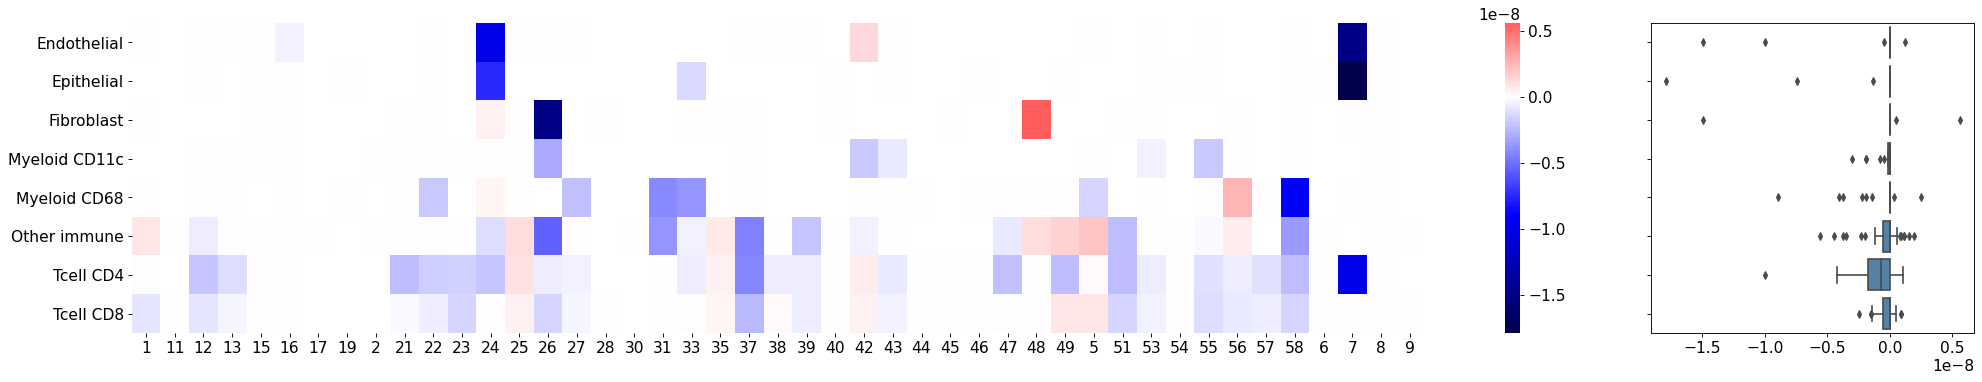

In [22]:
ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies,
    multiindex=False,
    figsize=(25., 5.)
)